In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Stats_data.csv")
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [4]:
x_features=['AGE','COUNTRY','PLAYING ROLE','T-RUNS','T-WKTS','ODI-RUNS-S','ODI-SR-B','ODI-WKTS','ODI-SR-BL','CAPTAINCY EXP','RUNS-S','HS','AVE','SR-B','SIXERS','RUNS-C','WKTS','AVE-BL','ECON','SR-BL']
cate_features=['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [5]:
df_enc=pd.get_dummies(df[x_features],columns=cate_features,drop_first=True)
df_enc.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,0,0,0,0,0,0,1,0,0,0


In [6]:
x_features=df_enc.columns

In [7]:
#import stats models api as sm
from statsmodels import api as sm
from sklearn.model_selection import train_test_split

x=sm.add_constant(df_enc)
y=df['SOLD PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.8, random_state=42)

In [8]:
x

,const,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,1.0,0,0,0,0.00,0,0.0,0,0,0.00,...,0,0,1,0,0,0,0,0,0,0
1,1.0,214,18,657,71.41,185,37.6,0,0,0.00,...,0,0,0,0,0,0,0,1,0,0
2,1.0,571,58,1269,80.62,288,32.9,167,39,18.56,...,0,0,0,0,0,0,0,1,0,0
3,1.0,284,31,241,84.56,51,36.8,58,11,5.80,...,0,0,0,0,0,0,0,1,0,0
4,1.0,63,0,79,45.93,0,0.0,1317,71,32.93,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.0,0,0,0,0.00,0,0.0,49,16,9.80,...,0,0,0,0,0,0,1,0,0,0
126,1.0,6398,7,6814,75.78,3,86.6,3,3,3.00,...,0,1,0,0,0,0,1,0,0,1
127,1.0,1775,9,8051,87.58,109,44.3,1237,66,26.32,...,0,0,0,0,0,0,1,0,0,1
128,1.0,1114,288,790,73.55,278,35.4,99,23,9.90,...,0,0,0,0,0,0,0,1,0,0


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(x):
    cols = len(x.columns)
    vif=[variance_inflation_factor(x,i) for i in range(cols)]
    vif_factors=pd.DataFrame()
    vif_factors['column']=x.columns
    vif_factors['VIF']=vif
    return vif_factors

In [10]:
vif_factors=get_vif_factors(x[x_features])
vif_factors

,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [11]:
columns_with_large_vif=vif_factors[vif_factors.VIF>4].column

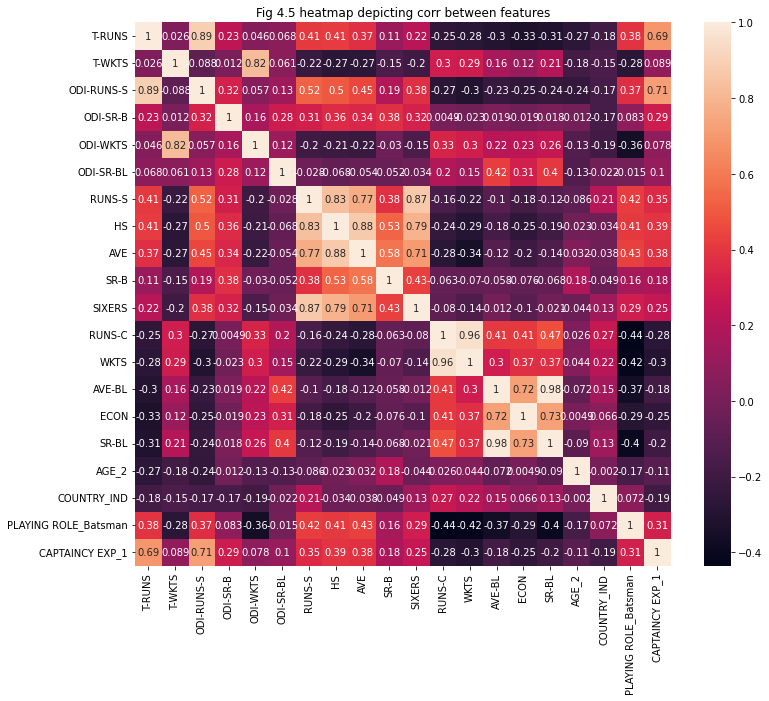

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sn.heatmap(x[columns_with_large_vif].corr(), annot = True);
plt.title("Fig 4.5 heatmap depicting corr between features");

In [13]:
columns_to_be_removed=['T-RUNS', 'T-WKTS','RUNS-S', 'HS', 'AVE','RUNS-C', 'SR-B', 'AVE-BL','ODI-SR-B','ODI-RUNS-S'
       'ECON', 'SR-BL', 'AGE_2']

In [14]:
x_new_features=list(set(x_features)-set(columns_to_be_removed))

In [15]:
get_vif_factors(x[x_new_features])

,column,VIF
0,COUNTRY_IND,3.409821
1,SIXERS,2.567125
2,ECON,3.634286
3,PLAYING ROLE_W. Keeper,1.979520
4,COUNTRY_ENG,1.167620
5,WKTS,3.008832
6,ODI-WKTS,2.761040
7,COUNTRY_PAK,1.395271
8,ODI-RUNS-S,4.566085
9,PLAYING ROLE_Batsman,2.703504


In [20]:
#X_train=X_train[x_new_features]
#X_test = X_test[x_new_features]
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [24]:
reg.fit(x, y)

RandomForestRegressor()

In [25]:
reg.score(X_train, Y_train)

0.8706538922148908

In [26]:
reg.score(X_test, Y_test)

0.8913876972366408